In [2]:
import numpy as np
import pandas as pd
!pip install transformers
import transformers
import torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.4 MB/s eta 0:00:00


In [3]:
data = pd.read_csv("Tweets.csv")

In [4]:
data.sample(9)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11792,567757851104641024,negative,0.6955,Can't Tell,0.3531,US Airways,NaN,BlessedEpiphany,NaN,0,@USAirways @AmericanAir best u could do-I mig...,NaN,2015-02-17 10:49:54 -0800,"Dallas, TX by way of Tampa, FL",America/Chicago
1081,569935215654600705,negative,1.0000,Flight Booking Problems,0.3602,United,NaN,aminghadersohi,NaN,0,@united go to hell,NaN,2015-02-23 11:01:58 -0800,"San Francisco, CA",NaN
4831,569691144897953793,negative,1.0000,Cancelled Flight,1.0000,Southwest,NaN,rwitte42,NaN,0,@SouthwestAir A-list preferred. DEN-DAL flight...,NaN,2015-02-22 18:52:07 -0800,Colorado,Mountain Time (US & Canada)
14376,569624948190261249,negative,1.0000,Customer Service Issue,1.0000,American,NaN,skadott,NaN,0,@AmericanAir are you kidding me? No one answe...,NaN,2015-02-22 14:29:05 -0800,"san marcos,ca",NaN
6234,568105844174397440,neutral,1.0000,NaN,NaN,Southwest,NaN,Karima_Hersi,NaN,0,@SouthwestAir lemme come to #DestinationDragon...,NaN,2015-02-18 09:52:42 -0800,"Ottawa,Canada",Central Time (US & Canada)
11822,567735337246806016,negative,1.0000,Cancelled Flight,0.6995,US Airways,NaN,erickofiejones,NaN,0,@USAirways Just contaced EYEWITNESS NEWS about...,NaN,2015-02-17 09:20:27 -0800,NaN,Eastern Time (US & Canada)
13623,569794574966591489,negative,0.6546,Late Flight,0.6546,American,NaN,flemmingerin,NaN,0,@AmericanAir hey I got a call saying our fligh...,NaN,2015-02-23 01:43:07 -0800,San Diego,NaN
13565,569829233423360000,neutral,0.6849,NaN,0.0000,American,NaN,ThatsKathalina,NaN,0,"@AmericanAir , CHECK DM PLEASE!",NaN,2015-02-23 04:00:50 -0800,NaN,Eastern Time (US & Canada)
12116,570284308210032640,negative,1.0000,Customer Service Issue,0.6632,American,NaN,BartonDVM,NaN,0,"@AmericanAir Its not that I wasn't offered ""pe...",NaN,2015-02-24 10:09:09 -0800,Arkansas,Central Time (US & Canada)


In [5]:
data.tail(9)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14631,569588464896876545,negative,1.0000,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada)
14632,569587813856841728,neutral,0.6760,NaN,0.0000,American,NaN,Chad_SMFYM,NaN,0,"“@AmericanAir: @TilleyMonsta George, that does...",NaN,2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada)
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [6]:
data.isnull()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False
1,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False
2,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,True,False,False,True,False,True,False,False,True,False,True,True
14636,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True
14637,False,False,False,True,True,False,True,False,True,False,False,True,False,False,True
14638,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False


In [7]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [10]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
# Download the 'punkt' resource
nltk.download('punkt')

# Function for text preprocessing
def preprocess_text(text):
    # Remove special characters, numbers, and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words and apply stemming
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words if word not in stop_words]

    return ' '.join(words)

# Apply preprocessing to your text data
data['cleaned_text'] = data['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plu ad commerci experi tacki
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anoth ...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica realli aggress blast obnoxi ente...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica realli big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,americanair thank got differ flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,americanair leav minut late flight warn commun...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,americanair pleas bring american airlin blackb...
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),americanair money chang flight answer phone su...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform your cleaned text data into numerical features
X = tfidf_vectorizer.fit_transform(data['cleaned_text'])
print(X)


  (0, 3669)	0.7800816797213191
  (0, 4762)	0.625677690958504
  (1, 4346)	0.5805463017579728
  (1, 1575)	0.307311420453228
  (1, 991)	0.45167838042609976
  (1, 47)	0.39294310455605913
  (1, 3238)	0.38106499195686655
  (1, 4762)	0.254749899934376
  (2, 4568)	0.3525246111404605
  (2, 175)	0.3414508060898834
  (2, 4356)	0.31919013269321783
  (2, 2859)	0.27908483728467737
  (2, 2676)	0.41053730496665575
  (2, 2821)	0.4762979081362108
  (2, 4509)	0.31005609977581683
  (2, 4762)	0.2963641295391545
  (3, 3470)	0.3577925213818057
  (3, 2533)	0.25908254748280324
  (3, 153)	0.16948056921683208
  (3, 1596)	0.3049648897716306
  (3, 1966)	0.3413066891008139
  (3, 1496)	0.28847905749063885
  (3, 2965)	0.38597523781348725
  (3, 464)	0.3515248988347255
  (3, 78)	0.3742783536627974
  :	:
  (14637, 616)	0.43405557459043603
  (14637, 96)	0.28749244861393364
  (14637, 3227)	0.2866432677826293
  (14638, 4237)	0.43349434711171225
  (14638, 992)	0.5127287619797888
  (14638, 144)	0.1645076138007683
  (14638, 2

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['airline_sentiment'], test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7971311475409836


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Calculate the distribution of sentiment
sentiment_distribution = data['airline_sentiment'].value_counts()

# Most common reasons for negative sentiments
common_negative_reasons = data[data['airline_sentiment'] == 'negative']['negativereason'].value_counts()

# Analyze the impact of airline sentiment confidence
data['airline_sentiment_confidence'].groupby(data['airline_sentiment']).mean()

# Explore the relationship between sentiment and airline
sentiment_by_airline = data.groupby(['airline', 'airline_sentiment']).size().unstack()


In [16]:
sentiment_by_airline

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [17]:
from gensim.models import Word2Vec

# Tokenize the cleaned text data
tokenized_data = data['cleaned_text'].apply(lambda x: x.split())

# Train a Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, sg=0)

# Find similar words
similar_words = w2v_model.wv.most_similar('flight', topn=5)
print("Words similar to 'flight':", similar_words)


Words similar to 'flight': [('flightlat', 0.995148777961731), ('flightat', 0.9793552756309509), ('flightl', 0.9754191040992737), ('tomorrow', 0.972342312335968), ('reinstat', 0.9662294983863831)]


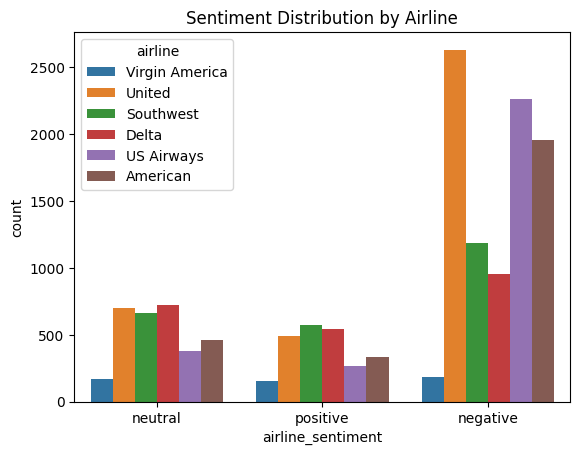

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='airline_sentiment', hue='airline')
plt.title("Sentiment Distribution by Airline")
plt.show()


In [19]:
import plotly.express as px

fig = px.scatter(data, x='retweet_count', y='airline_sentiment', color='airline_sentiment')
fig.update_layout(title="Interactive Scatter Plot")
fig.show()


In [20]:
import plotly.express as px

fig = px.box(data, x='airline', y='airline_sentiment_confidence', color='airline_sentiment')
fig.update_layout(title="Interactive Box Plot by Airline and Sentiment")
fig.show()


In [21]:
import plotly.express as px

fig = px.bar(data, x='airline', y='tweet_location', color='airline_sentiment',
             labels={'count': 'Sentiment Count'},
             title="Sentiment Distribution by Airline")
fig.show()


In [22]:
import plotly.express as px

fig = px.sunburst(data, path=['airline', 'airline_sentiment'], values='airline_sentiment_confidence',
                 title="Sentiment Breakdown by Airline")
fig.show()


In [23]:
import pandas as pd
import plotly.express as px

# Select numeric columns from your dataset
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation = numeric_data.corr()

# Create an interactive heatmap to visualize correlations
fig = px.imshow(correlation, x=correlation.columns, y=correlation.columns, color_continuous_scale='Viridis',
                labels=dict(color="Correlation"))
fig.update_layout(title="Correlation Heatmap for Numeric Columns")
fig.show()


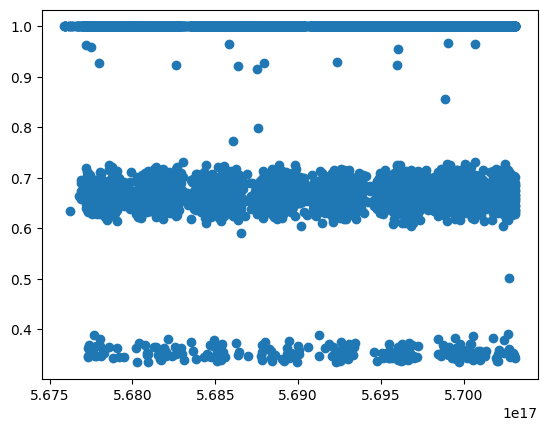

In [24]:
import matplotlib.pyplot as plt
plt.scatter(data.tweet_id, data.airline_sentiment_confidence)

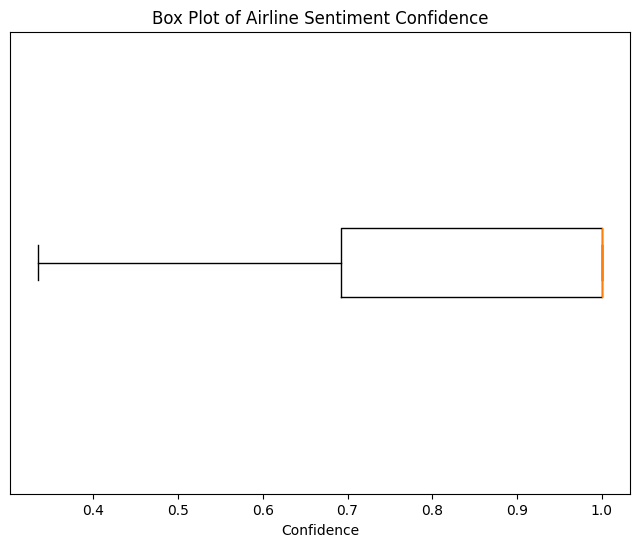

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(8, 6))
plt.boxplot(data['airline_sentiment_confidence'], vert=False)
plt.title('Box Plot of Airline Sentiment Confidence')
plt.xlabel('Confidence')
plt.yticks([])
plt.show()


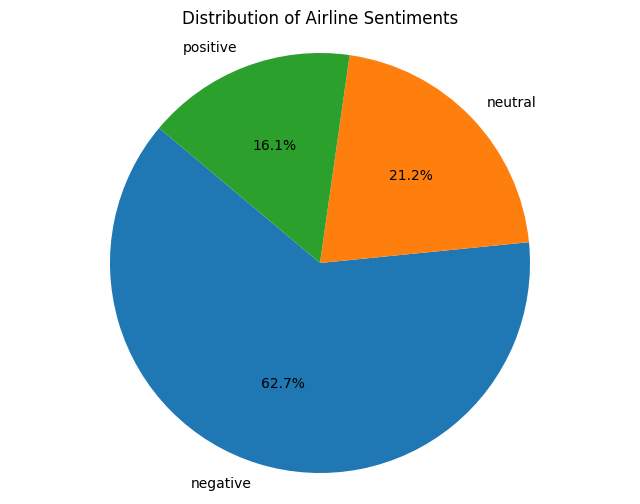

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
sentiment_counts = data['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Airline Sentiments')
plt.axis('equal')
plt.show()


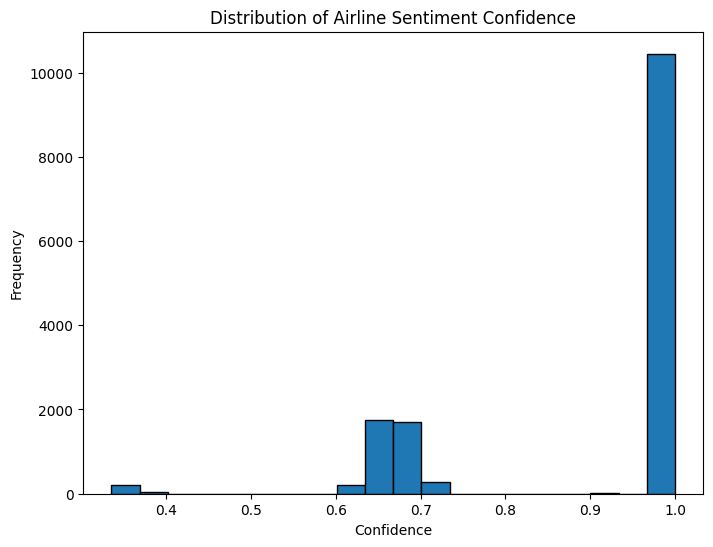

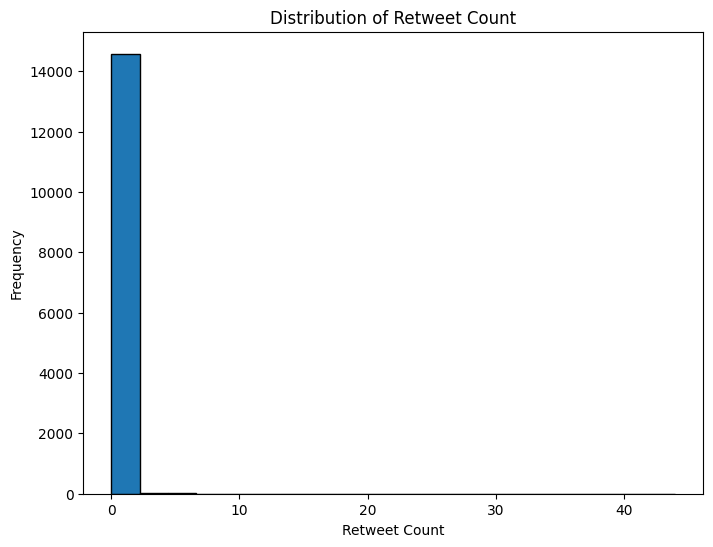

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(data['airline_sentiment_confidence'], bins=20, edgecolor='k')
plt.title('Distribution of Airline Sentiment Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
plt.hist(data['retweet_count'], bins=20, edgecolor='k')
plt.title('Distribution of Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.show()


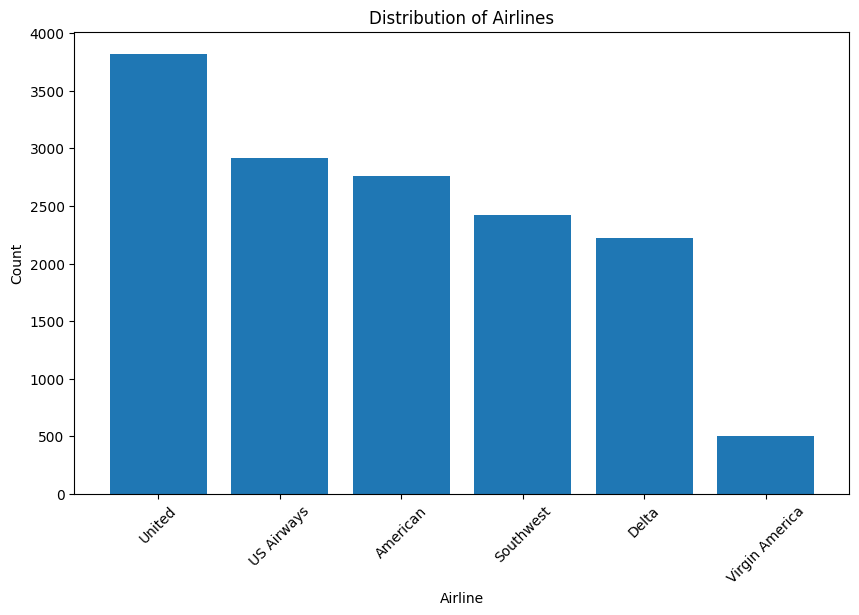

In [28]:
airline_counts = data['airline'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(airline_counts.index, airline_counts.values)
plt.title('Distribution of Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



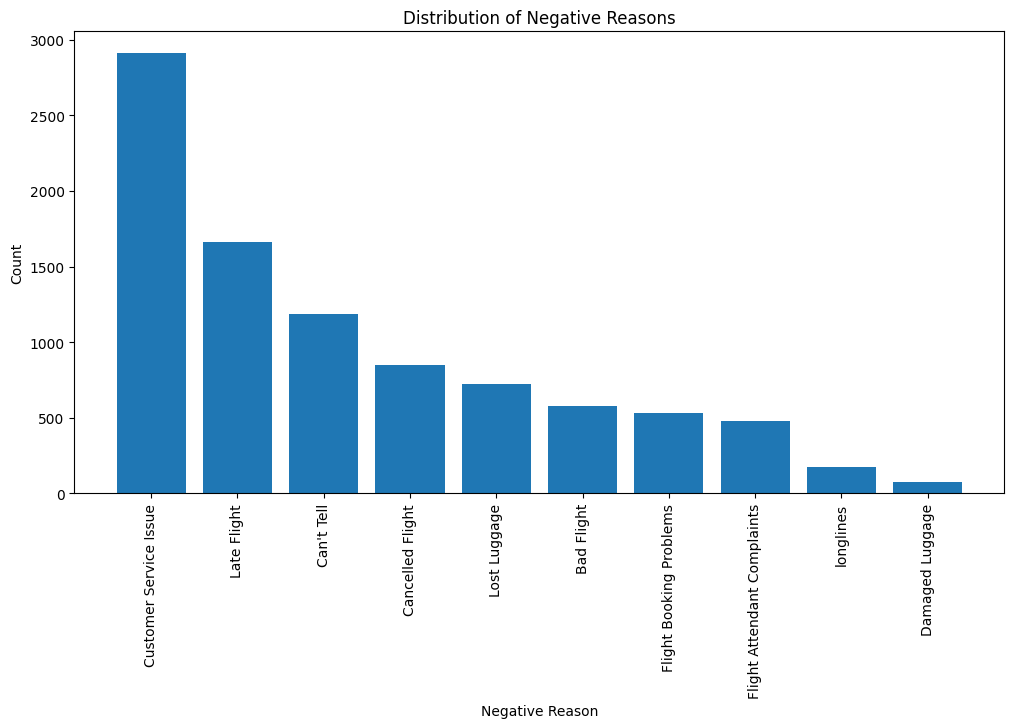

In [29]:
negativereason_counts = data['negativereason'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(negativereason_counts.index, negativereason_counts.values)
plt.title('Distribution of Negative Reasons')
plt.xlabel('Negative Reason')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

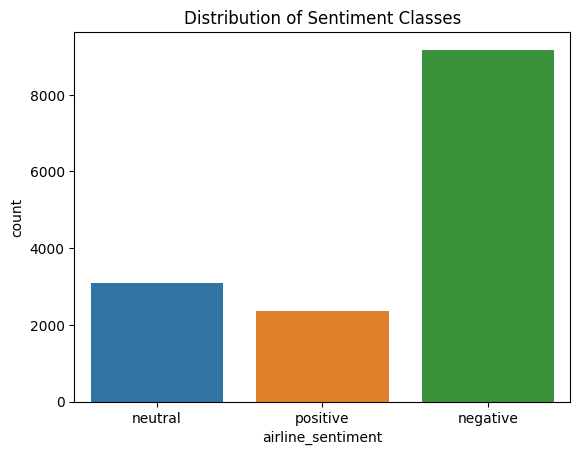

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='airline_sentiment')
plt.title("Distribution of Sentiment Classes")
plt.show()


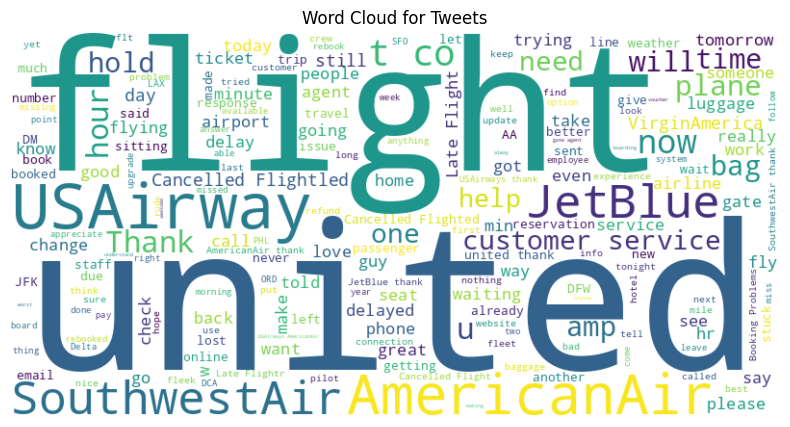

In [31]:
from wordcloud import WordCloud

text = " ".join(tweet for tweet in data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Tweets")
plt.show()


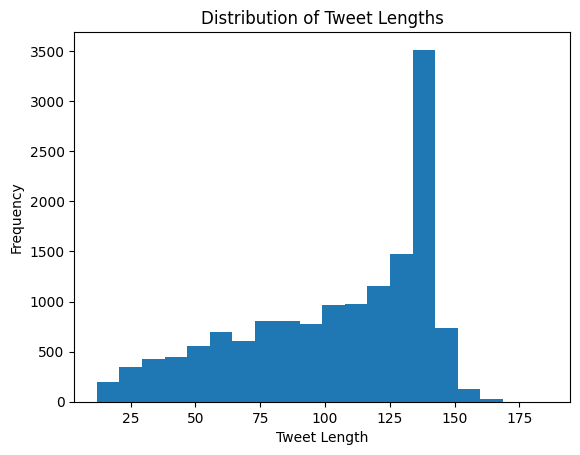

In [32]:
data['tweet_length'] = data['text'].apply(len)
plt.hist(data['tweet_length'], bins=20)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()


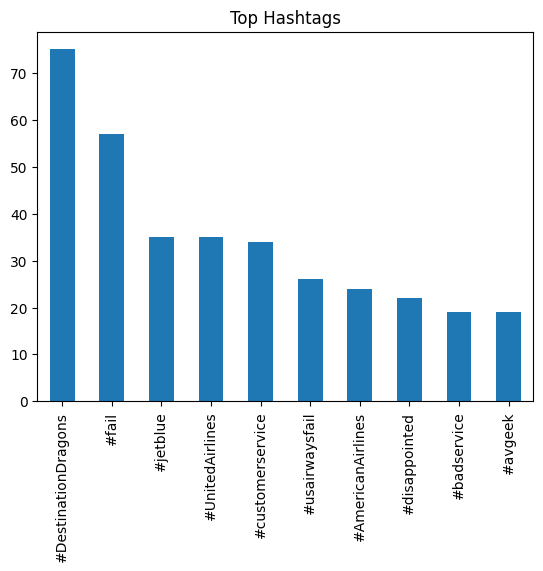

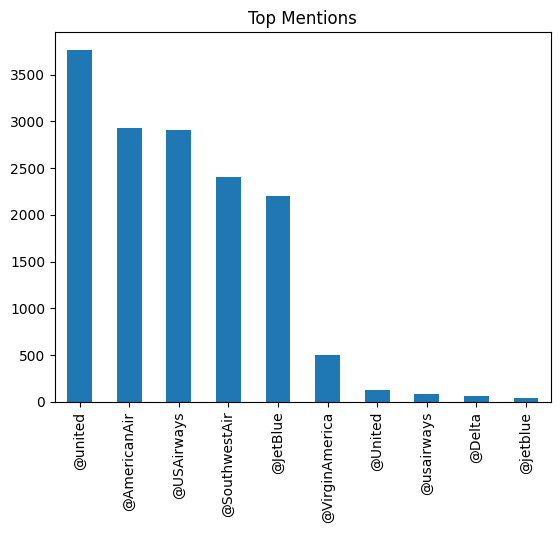

In [33]:
import re

hashtags = [tag for tweet in data['text'] for tag in re.findall(r'#\w+', tweet)]
mentions = [mention for tweet in data['text'] for mention in re.findall(r'@\w+', tweet)]

# Top hashtags
top_hashtags = pd.Series(hashtags).value_counts()[:10]
top_hashtags.plot(kind='bar', title="Top Hashtags")
plt.show()

# Top mentions
top_mentions = pd.Series(mentions).value_counts()[:10]
top_mentions.plot(kind='bar', title="Top Mentions")
plt.show()


In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
# Download the 'punkt' resource
nltk.download('punkt')

# Function for text preprocessing
def preprocess_text(text):
    # Remove special characters, numbers, and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words and apply stemming
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words if word not in stop_words]

    return ' '.join(words)

# Apply preprocessing to your text data
data['cleaned_text'] = data['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['airline_sentiment'], test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7971311475409836


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [36]:

# Calculate the distribution of sentiment
sentiment_distribution = data['airline_sentiment'].value_counts()

# Most common reasons for negative sentiments
common_negative_reasons = data[data['airline_sentiment'] == 'negative']['negativereason'].value_counts()

# Analyze the impact of airline sentiment confidence
data['airline_sentiment_confidence'].groupby(data['airline_sentiment']).mean()

# Explore the relationship between sentiment and airline
sentiment_by_airline = data.groupby(['airline', 'airline_sentiment']).size().unstack()


In [37]:
sentiment_by_airline

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [38]:
!pip install pandas textblob

In [41]:
import pandas as pd
from textblob import TextBlob


# Define a function to get sentiment polarity and subjectivity
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'text' column and create a new 'sentiment' column
data['sentiment'] = data['text'].apply(get_sentiment)

# Display the resulting DataFrame with sentiment labels
print(data[['tweet_id', 'text', 'sentiment']])


                 tweet_id                                               text  \
0      570306133677760513                @VirginAmerica What @dhepburn said.   
1      570301130888122368  @VirginAmerica plus you've added commercials t...   
2      570301083672813571  @VirginAmerica I didn't today... Must mean I n...   
3      570301031407624196  @VirginAmerica it's really aggressive to blast...   
4      570300817074462722  @VirginAmerica and it's a really big bad thing...   
...                   ...                                                ...   
14635  569587686496825344  @AmericanAir thank you we got on a different f...   
14636  569587371693355008  @AmericanAir leaving over 20 minutes Late Flig...   
14637  569587242672398336  @AmericanAir Please bring American Airlines to...   
14638  569587188687634433  @AmericanAir you have my money, you change my ...   
14639  569587140490866689  @AmericanAir we have 8 ppl so we need 2 know h...   

      sentiment  
0       neutral  
1  

In [43]:
# Create a summary table
sentiment_summary = data['sentiment'].value_counts().reset_index()
sentiment_summary.columns = ['Sentiment', 'Count']

# Display the table
print(sentiment_summary)

# Show the chart
plt.show()

  Sentiment  Count
0   neutral   5494
1  positive   5477
2  negative   3669


Text(0, 0.5, 'Count')

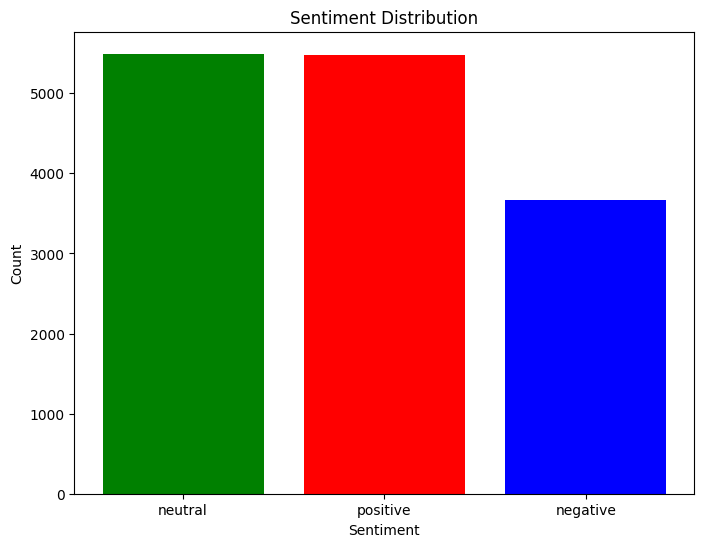

In [44]:
# Create a bar chart to visualize sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')